In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

2024-08-09 15:59:21.323961: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 15:59:21.324440: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 15:59:21.327058: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 15:59:21.334952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 15:59:21.348002: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
inputs = tf.keras.Input(shape=(28, 28, 1))

# 첫 번째 블록
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu')(inputs)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# 두 번째 블록 (MLPConv 레이어)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# 세 번째 블록 (MLPConv 레이어)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(10, activation='softmax')(x)

In [5]:
# 모델 생성
model = tf.keras.Model(inputs=inputs, outputs=x)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,818 (733.66 KB)

 Trainable params: 187,818 (733.66 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 학습
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6146 - loss: 1.0776 - val_accuracy: 0.9592 - val_loss: 0.1305
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9615 - loss: 0.1244 - val_accuracy: 0.9738 - val_loss: 0.0932
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9728 - loss: 0.0897 - val_accuracy: 0.9784 - val_loss: 0.0700
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.9789 - loss: 0.0689 - val_accuracy: 0.9804 - val_loss: 0.0661
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9824 - loss: 0.0588 - val_accuracy: 0.9843 - val_loss: 0.0590
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.9837 - loss: 0.0511 - val_accuracy: 0.9773 - val_loss: 0.0754
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 69ms/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.9836 - val_loss: 0.0616
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.9879 - loss: 0.0392 - 

In [7]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9871 - loss: 0.0401
Test Loss: 0.0396
Test Accuracy: 0.9876


In [13]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# 이미지 파일 경로
test1_path = 'test1.png'
test2_path = 'test2.png'

# 이미지를 (28, 28) 크기로 불러오고, grayscale로 변환
test1_img = load_img(test1_path, target_size=(28, 28), color_mode='grayscale')
test2_img = load_img(test2_path, target_size=(28, 28), color_mode='grayscale')


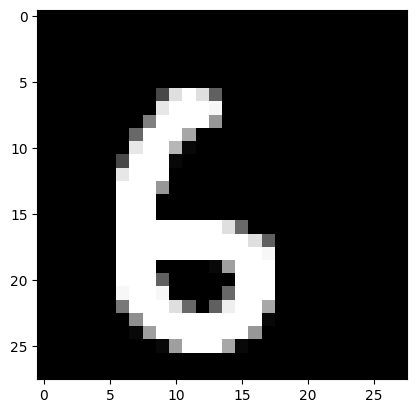

In [38]:
plt.imshow(test1_img, cmap='gray')

plt.imshow(test1_img)

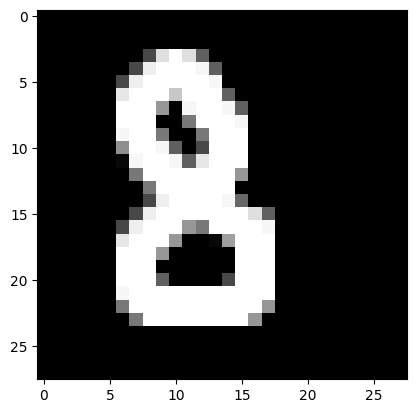

In [28]:
plt.imshow(test2_img, cmap='gray')

In [39]:
# 이미지를 NumPy 배열로 변환
test1_array = img_to_array(test1_img)
test2_array = img_to_array(test2_img)

# (28, 28, 1) 형태로 변환하고, 데이터 타입을 float32로 변환
test1_array = test1_array.astype(np.float32) / 255.0
test2_array = test2_array.astype(np.float32) / 255.0

# 모델에 입력하기 위해 배치 차원을 추가
test1_array = np.expand_dims(test1_array, axis=0)
test2_array = np.expand_dims(test2_array, axis=0)

# 모델을 사용하여 예측 수행
pred1 = model.predict(test1_array)
pred2 = model.predict(test2_array)

# 예측 결과를 클래스 레이블로 변환
label1 = np.argmax(pred1, axis=-1)
label2 = np.argmax(pred2, axis=-1)

print("Prediction for test1:", label1[0])
print("Prediction for test2:", label2[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for test1: 6
Prediction for test2: 8


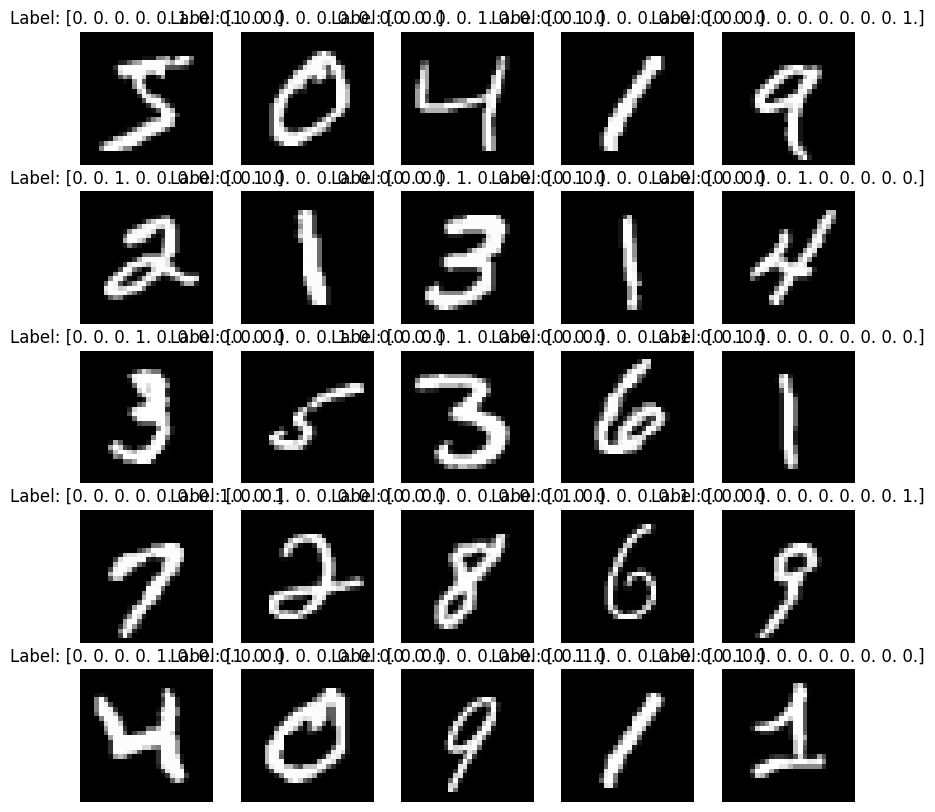

In [21]:
# 몇 개의 이미지를 시각화
def plot_mnist_images(images, labels, num_rows=5, num_cols=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')  # 축 숨기기
    plt.show()

# 첫 25개 이미지를 시각화
plot_mnist_images(x_train, y_train, num_rows=5, num_cols=5)